# LAMPADA Hg

https://atomic-spectra.net/spectrum.php?sw=550&lw=700&elem=Hg

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from jax import grad
from jax import numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'prisma.csv'
fr = pd.read_csv(FILE)
fr = fr.sort_values('RIFLESSA deg')

In [2]:
# START,,RIFLESSA deg,RIFLESSA prim,GIALLO deg,GIALLO prim,VERDE deg,VERDE prim,BLU deg,BLU prim,VIOLA deg,VIOLA prim

ang_incidente = np.array(fr['RIFLESSA deg'] + 0.01*fr['RIFLESSA prim']/6 - 90)* 0.5 # * np.pi/180
giallo = np.array(90 - fr['GIALLO deg'] + 0.01*fr['GIALLO prim']/6) # * np.pi/180
verde = np.array(90 - fr['VERDE deg'] + 0.01*fr['VERDE prim']/6) # * np.pi/180
blu = np.array(90 - fr['BLU deg'] + 0.01*fr['BLU prim']/6) # * np.pi/180
viola = np.array(90 - fr['VIOLA deg'] + 0.01*fr['VIOLA prim']/6) # * np.pi/180

sigmaY = 0.5 * np.ones_like(giallo) # * np.pi/180
sigmaX = 0.5 * np.ones_like(ang_incidente) # * np.pi/180

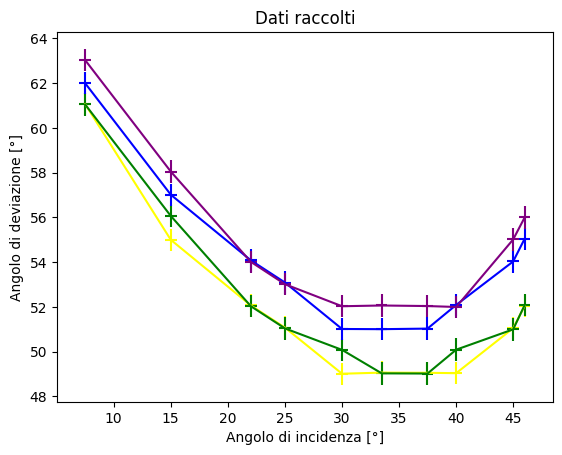

In [3]:
plt.title('Dati raccolti')
plt.errorbar(ang_incidente,giallo,yerr=sigmaY,xerr=sigmaX,color='yellow')
plt.errorbar(ang_incidente,verde,yerr=sigmaY,xerr=sigmaX,color='green')
plt.errorbar(ang_incidente,blu,yerr=sigmaY,xerr=sigmaX,color='blue')
plt.errorbar(ang_incidente,viola,yerr=sigmaY,xerr=sigmaX,color='purple')
plt.xlabel('Angolo di incidenza [°]')
plt.ylabel('Angolo di deviazione [°]')

plt.show()


### ANGOLO MINIMA DEVIAZIONE (FIT PARABOLICO)

Ricaviamo il valore dell'angolo di minima deviazione interpolando con una parabola gli angoli di deviazione



In [4]:
def parabola(x, a, b, θ):
    return a*(x - θ)**2 + b

fit_giallo = Interpolazione(ang_incidente, giallo,sigmaY,sigmaX, parabola, [0.1, 50, 35],names=['a','b','θ'])
fit_verde = Interpolazione(ang_incidente, verde,sigmaY,sigmaX, parabola, [0.1, 50, 35],names=['a','b','θ'])
fit_blu = Interpolazione(ang_incidente, blu,sigmaY,sigmaX, parabola, [0.1, 50, 35],names=['a','b','θ'])
fit_viola = Interpolazione(ang_incidente, viola,sigmaY,sigmaX, parabola, [0.1, 50, 35],names=['a','b','θ'])

fit = np.array([fit_giallo,fit_verde,fit_blu,fit_viola])

In [5]:
δm = np.array([f.values['θ'] for f in fit]) # indici di rifrazione
sigmaδm = np.array([f.errors['θ'] for f in fit])

n = np.sin((δm + 60)/2 * np.pi/180) / np.sin(30*np.pi/180)

λ_Hg = np.array([435.8, 404.7,546.1, 576.9]) # nm


# MIDURAZIONE DIRETTA ANGOLO DI MINIMA DEVIAZIONE

sono stati raccolti direttamente i valori di $\delta_m$

$\sin{(\frac{\delta_m + \alpha}{2})} = n \cdot \sin\frac{\alpha}{2}$

In [6]:
FILE = dir_path + '/data/' + 'prismaHg.csv'
fr = pd.read_csv(FILE)

α,sigmaα = np.float64(60.32),np.float64(0.67) # calcolati in angolo_alpha
# ROSSO deg ,ROSSO prim,GIALLO deg,GIALLO prim,VERDE deg,VERDE prim,ACQUA deg,ACQUA prim,BLU deg,BLU prim,VIOLA2 deg,VIOLA2 prim,VIOLA 1 deg,VIOLA 1 prim

rosso = np.array(fr['ROSSO deg'] + 0.01 * fr['ROSSO prim']/6)
verde = np.array(fr['VERDE deg'] + 0.01 * fr['VERDE prim']/6)
blu = np.array(fr['BLU deg'] + 0.01 * fr['BLU prim']/6)
viola1 = np.array(fr['VIOLA 1 deg'] + 0.01 * fr['VIOLA 1 prim']/6)
viola2 = np.array(fr['VIOLA2 deg'] + 0.01 * fr['VIOLA2 prim']/6)
acqua = np.array(fr['ACQUA deg'] + 0.01 * fr['ACQUA prim']/6)
giallo = np.array(fr['GIALLO deg'] + 0.01 * fr['GIALLO prim']/6)

rossom, sigmarosso = np.mean(rosso), np.std(rosso, ddof=1)
verdem, sigmaverde = np.mean(verde), np.std(verde, ddof=1)
blum, sigmablu = np.mean(blu), np.std(blu, ddof=1)
viola1m, sigmaviola1 = np.mean(viola1), np.std(viola1, ddof=1)
viola2m, sigmaviola2 = np.mean(viola2), np.std(viola2, ddof=1)
acquam, sigmaacqua = np.mean(acqua), np.std(acqua, ddof=1)
giallom, sigmagiallo = np.mean(giallo), np.std(giallo, ddof=1)

FILE = dir_path + '/data/' + 'LINEE_SPETTRO_Hg.csv'
fr = pd.read_csv(FILE)
fr.set_index('colore',inplace=True)

# ESCLUDO I VIOLA IN QUANTO DIFFICILMENTE VISIBLI

λ = np.array(fr['λ (nm)'])# [:-2] # nm
sigmaλ = np.array(fr['sigmaλ']) #[:-2]
δm = np.array([rossom,giallom,verdem,acquam,blum,viola1m,viola2m])
sigmaδm = np.array([sigmarosso,sigmagiallo,sigmaverde,sigmaacqua,sigmablu,sigmaviola1,sigmaviola2])

print(λ)
print(sigmaλ)
print(δm)

[615 579 546 485 436 423 426]
[ 3  2  1  1  1 20 20]
[311.69444444 311.06666667 311.02222222 310.06111111 309.05277778
 308.02388889 308.06888889]


----------------- VALORI FIT: -----------------
a: (-1.472 ± 0.037)e-1 
b: (1.037 ± 0.089)e4 

dof: 5
chi2: 4.51
chi2 ridotto: 0.9
pvalue: 0.48
------------------------------------------------



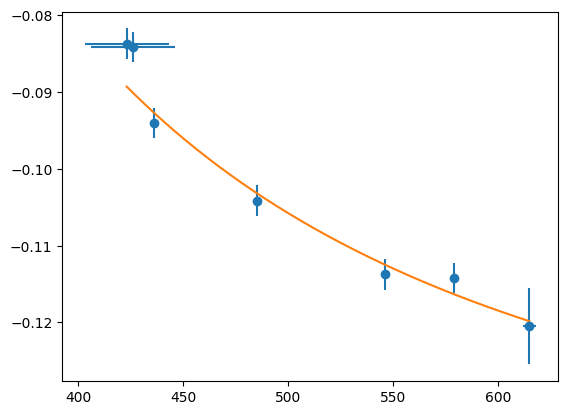

In [7]:
def indice_rifrazione(δm,α):
    return jnp.sin((δm + α)/2 * jnp.pi/180) / jnp.sin(α*jnp.pi/180)

α,sigmaα = 60.32,0.67
n = indice_rifrazione(δm, α)

didn = np.array([grad(indice_rifrazione, argnums=0)(i, α) for i in n])
dida = np.array([grad(indice_rifrazione, argnums=1)(i, α) for i in n])

sigman = np.sqrt((didn * sigmaδm)**2 + (dida * sigmaα)**2)


######################## stima parametri a , b 

def indice_rifrazione_lambda(λ,a,b):
    return a + b/λ**2

fit = Interpolazione(λ, n, sigman, sigmaλ, indice_rifrazione_lambda, [1.5, 0.1], names=['a','b'])
print(fit)

plt.errorbar(λ,n,yerr=sigman,xerr=sigmaλ,fmt='o')
plt.plot(*fit.draw())
plt.show()